# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

The correction reads:

$$\frac{\langle U \rangle _{tail}}{N}   = \frac{8\pi\rho\epsilon}{9 r_c^9} - \frac{8\pi\rho \epsilon}{3 r_c^3} \qquad \qquad \frac{\langle W \rangle _{tail}}{3N\epsilon}= 32\pi\rho\left[\frac{1}{9 r_c^9}- \frac{1}{6 r_c^3} \right]$$


```bash
Gas
vtail = -0.00335096
ptail = -0.00670178
Liquid
vtail = -0.428346
ptail = -0.855522
Solid
vtail = -0.862908
ptail = -1.72073
```

### Exercise 07.2

Use the NSL simulator code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

Acceptance ratio has are around 50% (61% for gas) when we choose:

$$ \begin{cases}
  Delta_{gas} = 6 \\
  Delta_{liquid} = 0.1 \\
  Delta_{solid} = 0.05
\end{cases}$$

In [23]:
import matplotlib.pyplot as plt
import numpy as np

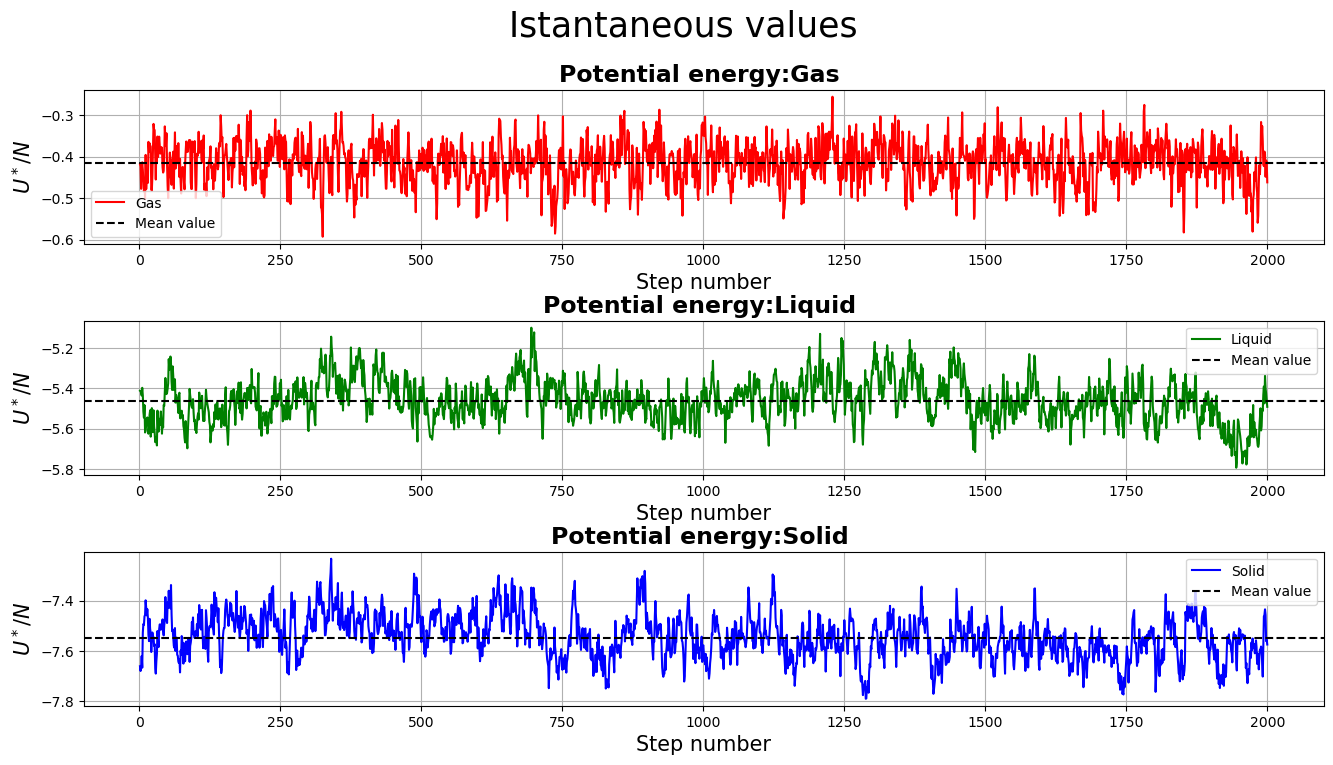

In [26]:
npart = 108

N = 2000
x = np.arange(N)+1    

phase = ["Gas", "Liquid", "Solid"]
colors = ["r","g","b"]
k=0

plt.figure(figsize=(16,8))
plt.suptitle("Istantaneous values", fontsize = 25)

for i in range(0,3):
    plt.subplot(3,1,i+1)
    U = np.loadtxt("../DATA/Autocorr/" + phase[i] + "/potential_energy.dat", usecols=(1), skiprows=1, unpack=True)
    meanval=np.mean(U)
    plt.plot(x, U[:N], marker='', label=phase[i], color = colors[i])
    plt.axhline(y=meanval, color='black', linestyle='--', label='Mean value')  
    plt.title(f'Potential energy:{phase[i]} ', fontsize = 17, fontweight = "bold")
    plt.ylabel('$U^*/N$', fontsize = 15)
    plt.xlabel('Step number', fontsize = 15)
    plt.grid(True)
    plt.legend()
    plt.subplots_adjust(hspace=0.5)

plt.show()

## Autocorrelation

From the previous graphs, it is evident that successive measurements of $U/N$ are correlated with each other, for extended time steps the istantaneos values are above or below the the average value, so an instantaneous values depend from the previous history of the system. To effectively perform data blocking, I need to estimate the autocorrelation "time" $\tau$ (in units of MC steps) and set the number of steps per block $\gg \tau$. To do this, I used the 500,000 samples from the previous section, analyzing them in the following Python snippets. The formula describing the autocorrelation as a function of the number of steps is:

$$
\chi(t) = \frac{
    \frac{1}{t_{\text{max}}-t} \sum_0^{t_{\text{max}}-t} m(t') m(t'+t) 
    - \frac{1}{t_{\text{max}}-t} \sum_0^{t_{\text{max}}-t} m(t')
    \times \frac{1}{t_{\text{max}}-t} \sum_0^{t_{\text{max}}-t} m(t'+t)
}{
    \frac{1}{t_{\text{max}}} \sum_0^{t_{\text{max}}} m^2(t') 
    - \left( \frac{1}{t_{\text{max}}} \sum_0^{t_{\text{max}}} m(t') \right)^2}
$$

I apply this formula for each phase. Here's what i do:

- Define $t\in [0,200]$ in discrete steps of 1
- calculate variance(the denominator of the formula above) once for each phase
- then calculate for each t the quantity $\chi(t)$ and plot it

Autocorrelation $\chi(t)$ is a statistical concept that measures the degree of similarity between a given time series and a lagged version of itself over successive time intervals. In simpler terms, it quantifies how a signal or a time series $m(t')$ is correlated with a delayed (lagged) version of itself $m(t'+t)$.

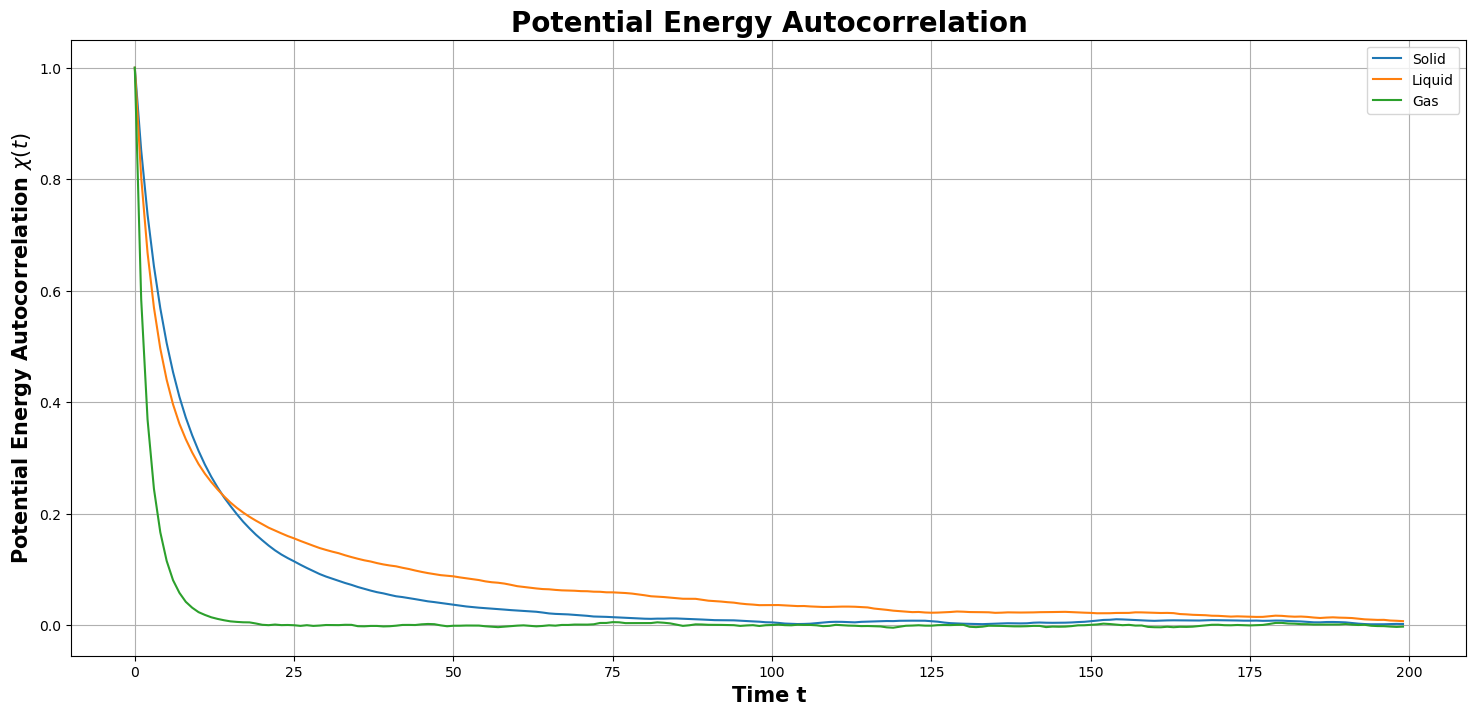

In [27]:
# 7.2.1

phase = ["Solid", "Liquid", "Gas"]

plt.figure(figsize = (18,8)) # figsize=(width, height)
M = 500000
# define the array to store the data for each phase once 
data= np.array([np.zeros(M),np.zeros(M),np.zeros(M)])

for i,p in enumerate(phase): # i is the index of phase, p is the phase
    data[i] = np.loadtxt("../DATA/Autocorr/" + p + "/potential_energy.dat", usecols=(1), skiprows=1, unpack=True)
    
    time = np.arange(0,200,1)
    tmax = len(data[i])
    variance = np.sum((data[i] - np.mean(data[i]))**2) / len(data[i])

    autocorr = np.zeros(len(time))

    for j,t in enumerate(time): #j is the index of time, t is the time
        num = np.sum(data[i][0:tmax-t]*data[i][t:tmax]) /(tmax-t)
        num -= np.sum(data[i][0:tmax-t]) * np.sum(data[i][t:tmax]) / (tmax-t)**2
        autocorr[j] = num / variance

    plt.plot(time, autocorr, label=p)
plt.xlabel("Time t", fontsize = 15, fontweight = "bold")
plt.ylabel("Potential Energy Autocorrelation $\chi(t)$", fontsize = 15, fontweight = "bold")
plt.title("Potential Energy Autocorrelation", fontsize = 20, fontweight = "bold")
# plt.xscale("log")
# plt.yscale("log")
plt.grid()
plt.legend()
plt.show()

__Autocorrelation Time ($\tau$):__

Autocorrelation time ($\tau$) in a time series refers to the time lag after which successive values become uncorrelated. 
In our case, it seems that after 20 time steps for Gas,100 for the Solid and 200 for Liquid, the autocorrelation dies down significantly.
When performing Data Blocking, whose effectiveness heavily relies on the assumption that successive blocks (subsets of the data) are statistically independent, if the block size is smaller than the autocorrelation time ($\tau$), the blocks will likely still contain some level of correlation and each block may not capture independent samples because autocorrelation within each block will introduce dependencies. This can lead to an underestimation of the statistical uncertainty (error) because the blocks are not truly independent.

Next i'll plot the statistical uncertainty given by Data Blocking on the set of M= 500000 values of potential energy as a function of the block size.

$$ \sigma_{\langle g \rangle} = \sqrt{\frac{1}{N-1}\left[\langle g^2 \rangle - \langle g\rangle^2 \right]} $$

(50000, 10)
(45454, 11)
(41666, 12)
(38461, 13)
(35714, 14)
(33333, 15)
(31250, 16)
(29411, 17)
(27777, 18)
(26315, 19)
(25000, 20)
(23809, 21)
(22727, 22)
(21739, 23)
(20833, 24)
(20000, 25)
(19230, 26)
(18518, 27)
(17857, 28)
(17241, 29)
(16666, 30)
(16129, 31)
(15625, 32)
(15151, 33)
(14705, 34)
(14285, 35)
(13888, 36)
(13513, 37)
(13157, 38)
(12820, 39)
(12500, 40)
(12195, 41)
(11904, 42)
(11627, 43)
(11363, 44)
(11111, 45)
(10869, 46)
(10638, 47)
(10416, 48)
(10204, 49)
(10000, 50)
(9803, 51)
(9615, 52)
(9433, 53)
(9259, 54)
(9090, 55)
(8928, 56)
(8771, 57)
(8620, 58)
(8474, 59)
(8333, 60)
(8196, 61)
(8064, 62)
(7936, 63)
(7812, 64)
(7692, 65)
(7575, 66)
(7462, 67)
(7352, 68)
(7246, 69)
(7142, 70)
(7042, 71)
(6944, 72)
(6849, 73)
(6756, 74)
(6666, 75)
(6578, 76)
(6493, 77)
(6410, 78)
(6329, 79)
(6250, 80)
(6172, 81)
(6097, 82)
(6024, 83)
(5952, 84)
(5882, 85)
(5813, 86)
(5747, 87)
(5681, 88)
(5617, 89)
(5555, 90)
(5494, 91)
(5434, 92)
(5376, 93)
(5319, 94)
(5263, 95)
(5208, 96)
(5

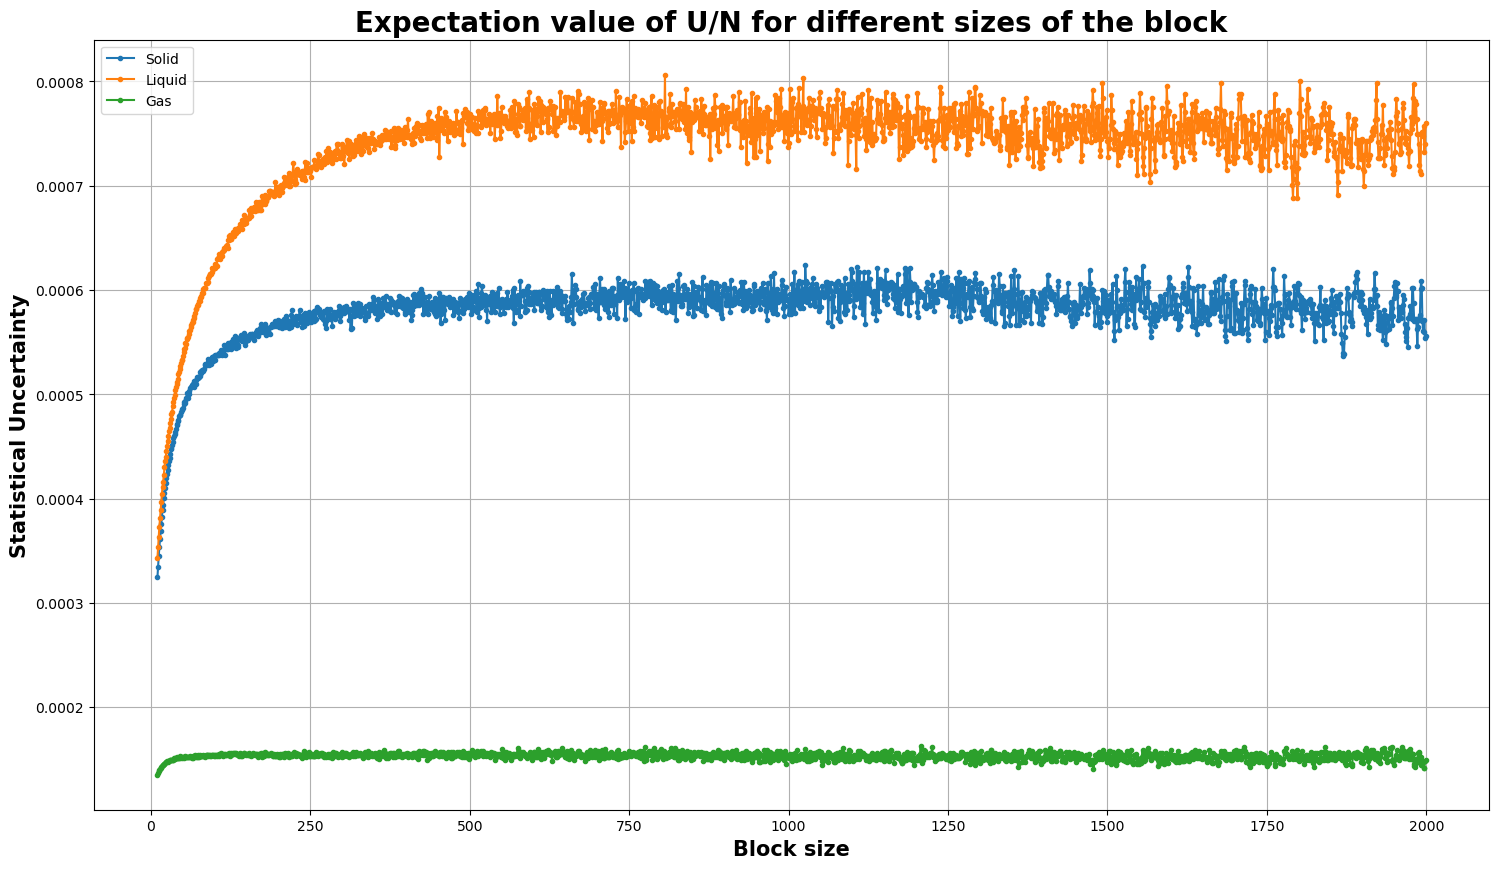

Optimized version execution time: 1.1894629001617432


In [38]:
#7.2.2
import time  # Import the time module to measure execution time

start_time = time.time()  # Record the start time

def data_blocking(y):
    """
    Calculate the error using the data blocking method.

    Parameters:
    - y: 2D array containing data divided into blocks.

    Returns:
    - error: Statistical error calculated using the data blocking method.
    """
    # Calculate the mean of each block directly without splitting
    block_means = np.mean(y, axis=1)  # Calculate the mean of each sub-array (block)
    # Calculate the global average and global average squared
    glob_av = np.mean(block_means)
    glob_av2 = np.mean(block_means**2)
    
    # Calculate the error using the formula for statistical error in data blocking
    blocks = len(y)
    error = np.sqrt((glob_av2 - glob_av**2) / (blocks - 1))
    return error

plt.figure(figsize=(18, 10))  # Create a figure for plotting with a specified size

# Loop over the phase and data arrays simultaneously
for p, y in zip(phase, data):
    plt.title("Statistical error - " + p, size='xx-large', weight='bold')  # Set the title of the plot

    L = np.arange(10, 2000, 1)  # Create an array of block sizes from 10 to 999
    err = np.zeros(len(L))  # Pre-allocate memory for the error array

    # Iterate over block sizes and calculate the statistical error
    for i, Len in enumerate(L):
        N = len(y) // Len  # Determine the number of complete blocks
        # Reshape the data array to have N rows and Len columns
        # only elements up to N*Len elements are considered in the calculation
        y_reshaped = y[0:N*Len].reshape((N, Len))  # Reshape data array for vectorized calculation
        print(np.shape(y_reshaped))
        err[i] = data_blocking(y_reshaped)  # Calculate the error for the current block size

    plt.plot(L, err, marker='.', linestyle='-', label=p)  # Plot the error against block size

# Set the labels and title for the plot
plt.title('Expectation value of U/N for different sizes of the block', fontsize=20, fontweight='bold')
plt.xlabel('Block size', fontsize=15, fontweight='bold')
plt.ylabel('Statistical Uncertainty', fontsize=15, fontweight='bold')
plt.grid(True)  # Add a grid to the plot
# plt.xlim(0, 5000)  # Optionally set the x-axis limit
plt.legend()  # Add a legend to the plot
plt.show()  # Display the plot

end_time = time.time()  # Record the end time
optimized_time = end_time - start_time  # Calculate the execution time
print("Optimized version execution time:", optimized_time)  # Print the execution time

Observing the effect of block size on statistical uncertainty reveals that for block sizes smaller than the autocorrelation time $\tau$, Data Blocking underestimates the uncertainty. As the block size increases beyond $\tau$, the uncertainty stabilizes around a mean value. This critical block size is directly linked to $\tau$: in the case of Gas, it aligns closely with $\tau$ itself, resulting in an immediate stabilization. However, for Solid and Liquid phases where $\tau$ is greater, larger block sizes are required to achieve stabilization

### Exercise 07.3 Radial Distribution

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

`input.dat` file for Gas, Liquid and Solid MC simulation
```bash
SIMULATION_TYPE        1
RESTART                0
TEMP                   1.2 / 1.1 / 0.8
NPART                  108
RHO                    0.05 / 0.8 / 1.1
R_CUT                  5.0 / 2.5 / 2.2
DELTA                  6 / 0.1 / 0.05
NBLOCKS                50
NSTEPS                 2000

ENDINPUT

```

Given the results from the previous analysis, i choose a block size of 2000 for the 3 phases.

The function $g(r)$ describes the probability of finding a particle at a distance $r$ from a reference particle. The analytical expression for $g(r)$ is:

$$
g(r) = \frac{1}{\rho N \Delta V(r)} \left\langle \sum_{i=1}^{N} \sum_{j=1, j \neq i}^{N} \delta(r - |\vec{r}_i - \vec{r}_j|) \right\rangle
$$

where $\Delta V(r) = \frac{4\pi}{3}[(r+dr)^3 - r^3]$ is the volume of a spherical shell in which the particle is sought.

In my code, I estimated $g(r)$ by dividing the aforementioned interval into $100$ subintervals (thus $dr = L/200$), and cycling through pairs of particles: each time the distance corresponds to the i-th bin, I incremented the i-th bin by 2 to account for both particles. Normalization is applied only at the end of the calculation.

The data is saved in the form of a histogram with $100$ bins: I wrote to file the value each bin (block averaged) only for the last block. 

Below, I have presented an example of the $g(r)$ behavior for the solid, liquid, and gaseous states, demonstrating that uncertainty bars are present despite being not visible by multipliying the uncertainty by a factor of 10.


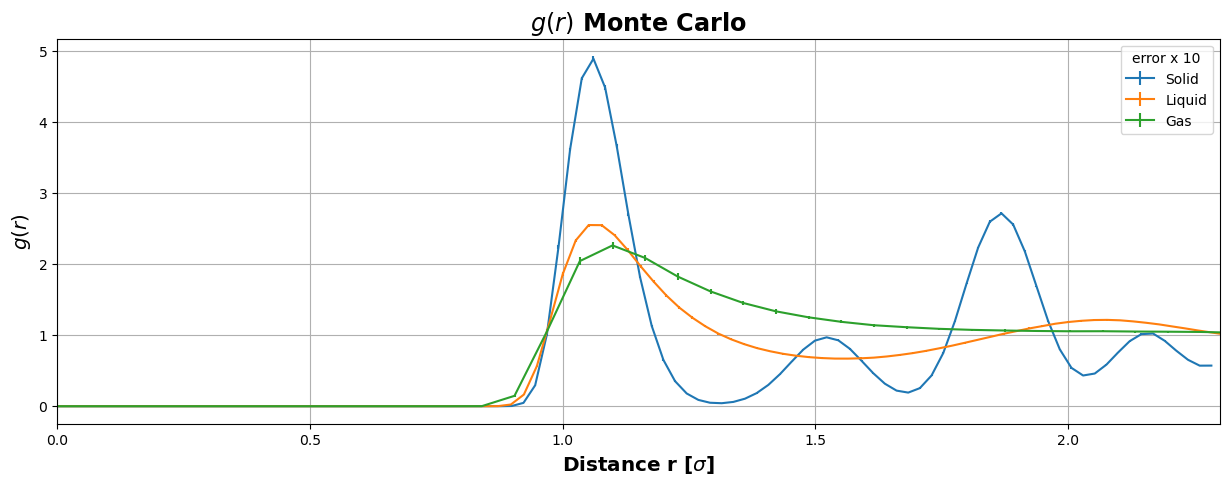

In [36]:
fig=plt.figure(figsize=(15, 5)) # figsize=(width, height)

for i in range(0,3):

    x,gdr,err = np.loadtxt("../DATA/gofr/MC/"+phase[i]+"/gofr.dat", usecols=(0,1,2), unpack='true',skiprows=1)

    plt.errorbar(x, gdr, err*10, marker='', label=phase[i])
    plt.title('$g(r)$ Monte Carlo', size='xx-large', weight='bold')
    plt.ylabel('$g(r)$', size='x-large', weight='bold')
    plt.xlabel('Distance r [$\sigma$]', size='x-large', weight='bold')
    plt.xlim(0,2.3)
    plt.grid(True)
    plt.legend(title='error x 10')
    
plt.show()

### Exercise 07.4

By means of your upgraded NSL simulator code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

`input.dat` for MD simulation of Gas,Liquid,Solid:

```bash
SIMULATION_TYPE        0
RESTART                0
TEMP                   0.941 / 2.0838 / 1.596
NPART                  108
RHO                    0.05 / 0.8 / 1.1
R_CUT                  5.0 / 2.5 / 2.2
DELTA                  0.0005
NBLOCKS                50
NSTEPS                 2000

ENDINPUT

```

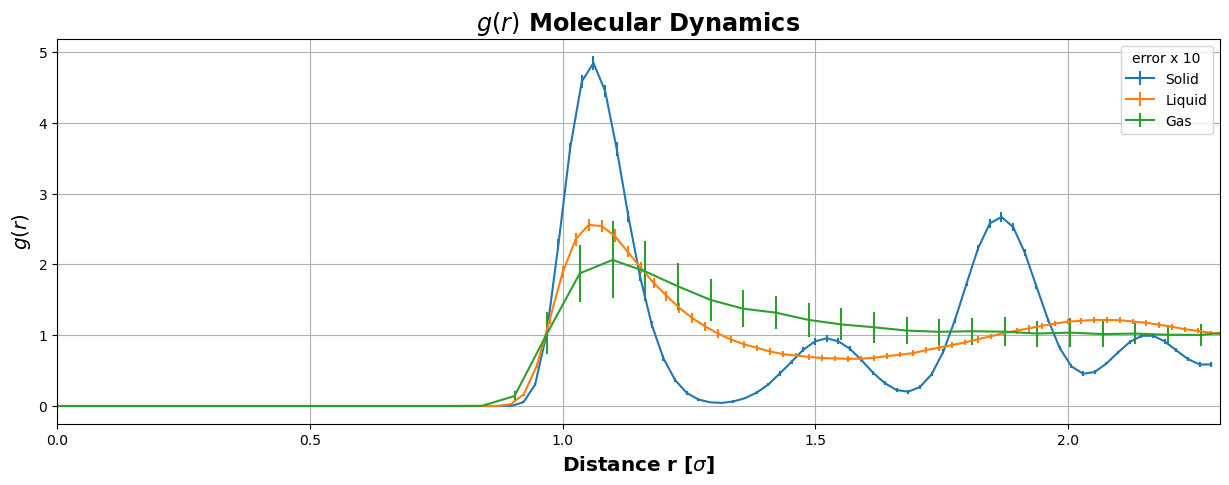

In [37]:
fig=plt.figure(figsize=(15, 5)) # figsize=(width, height)

for i in range(0,3):

    x,gdr,err = np.loadtxt("../DATA/gofr/MD/"+phase[i]+"/gofr.dat", usecols=(0,1,2), unpack='true',skiprows=1)

    plt.errorbar(x, gdr, err*10, marker='', label=phase[i])
    plt.title('$g(r)$ Molecular Dynamics', size='xx-large', weight='bold')
    plt.ylabel('$g(r)$', size='x-large', weight='bold')
    plt.xlabel('Distance r [$\sigma$]', size='x-large', weight='bold')
    plt.xlim(0,2.3)
    plt.grid(True)
    plt.legend(title = 'error x 10')

    
plt.show()


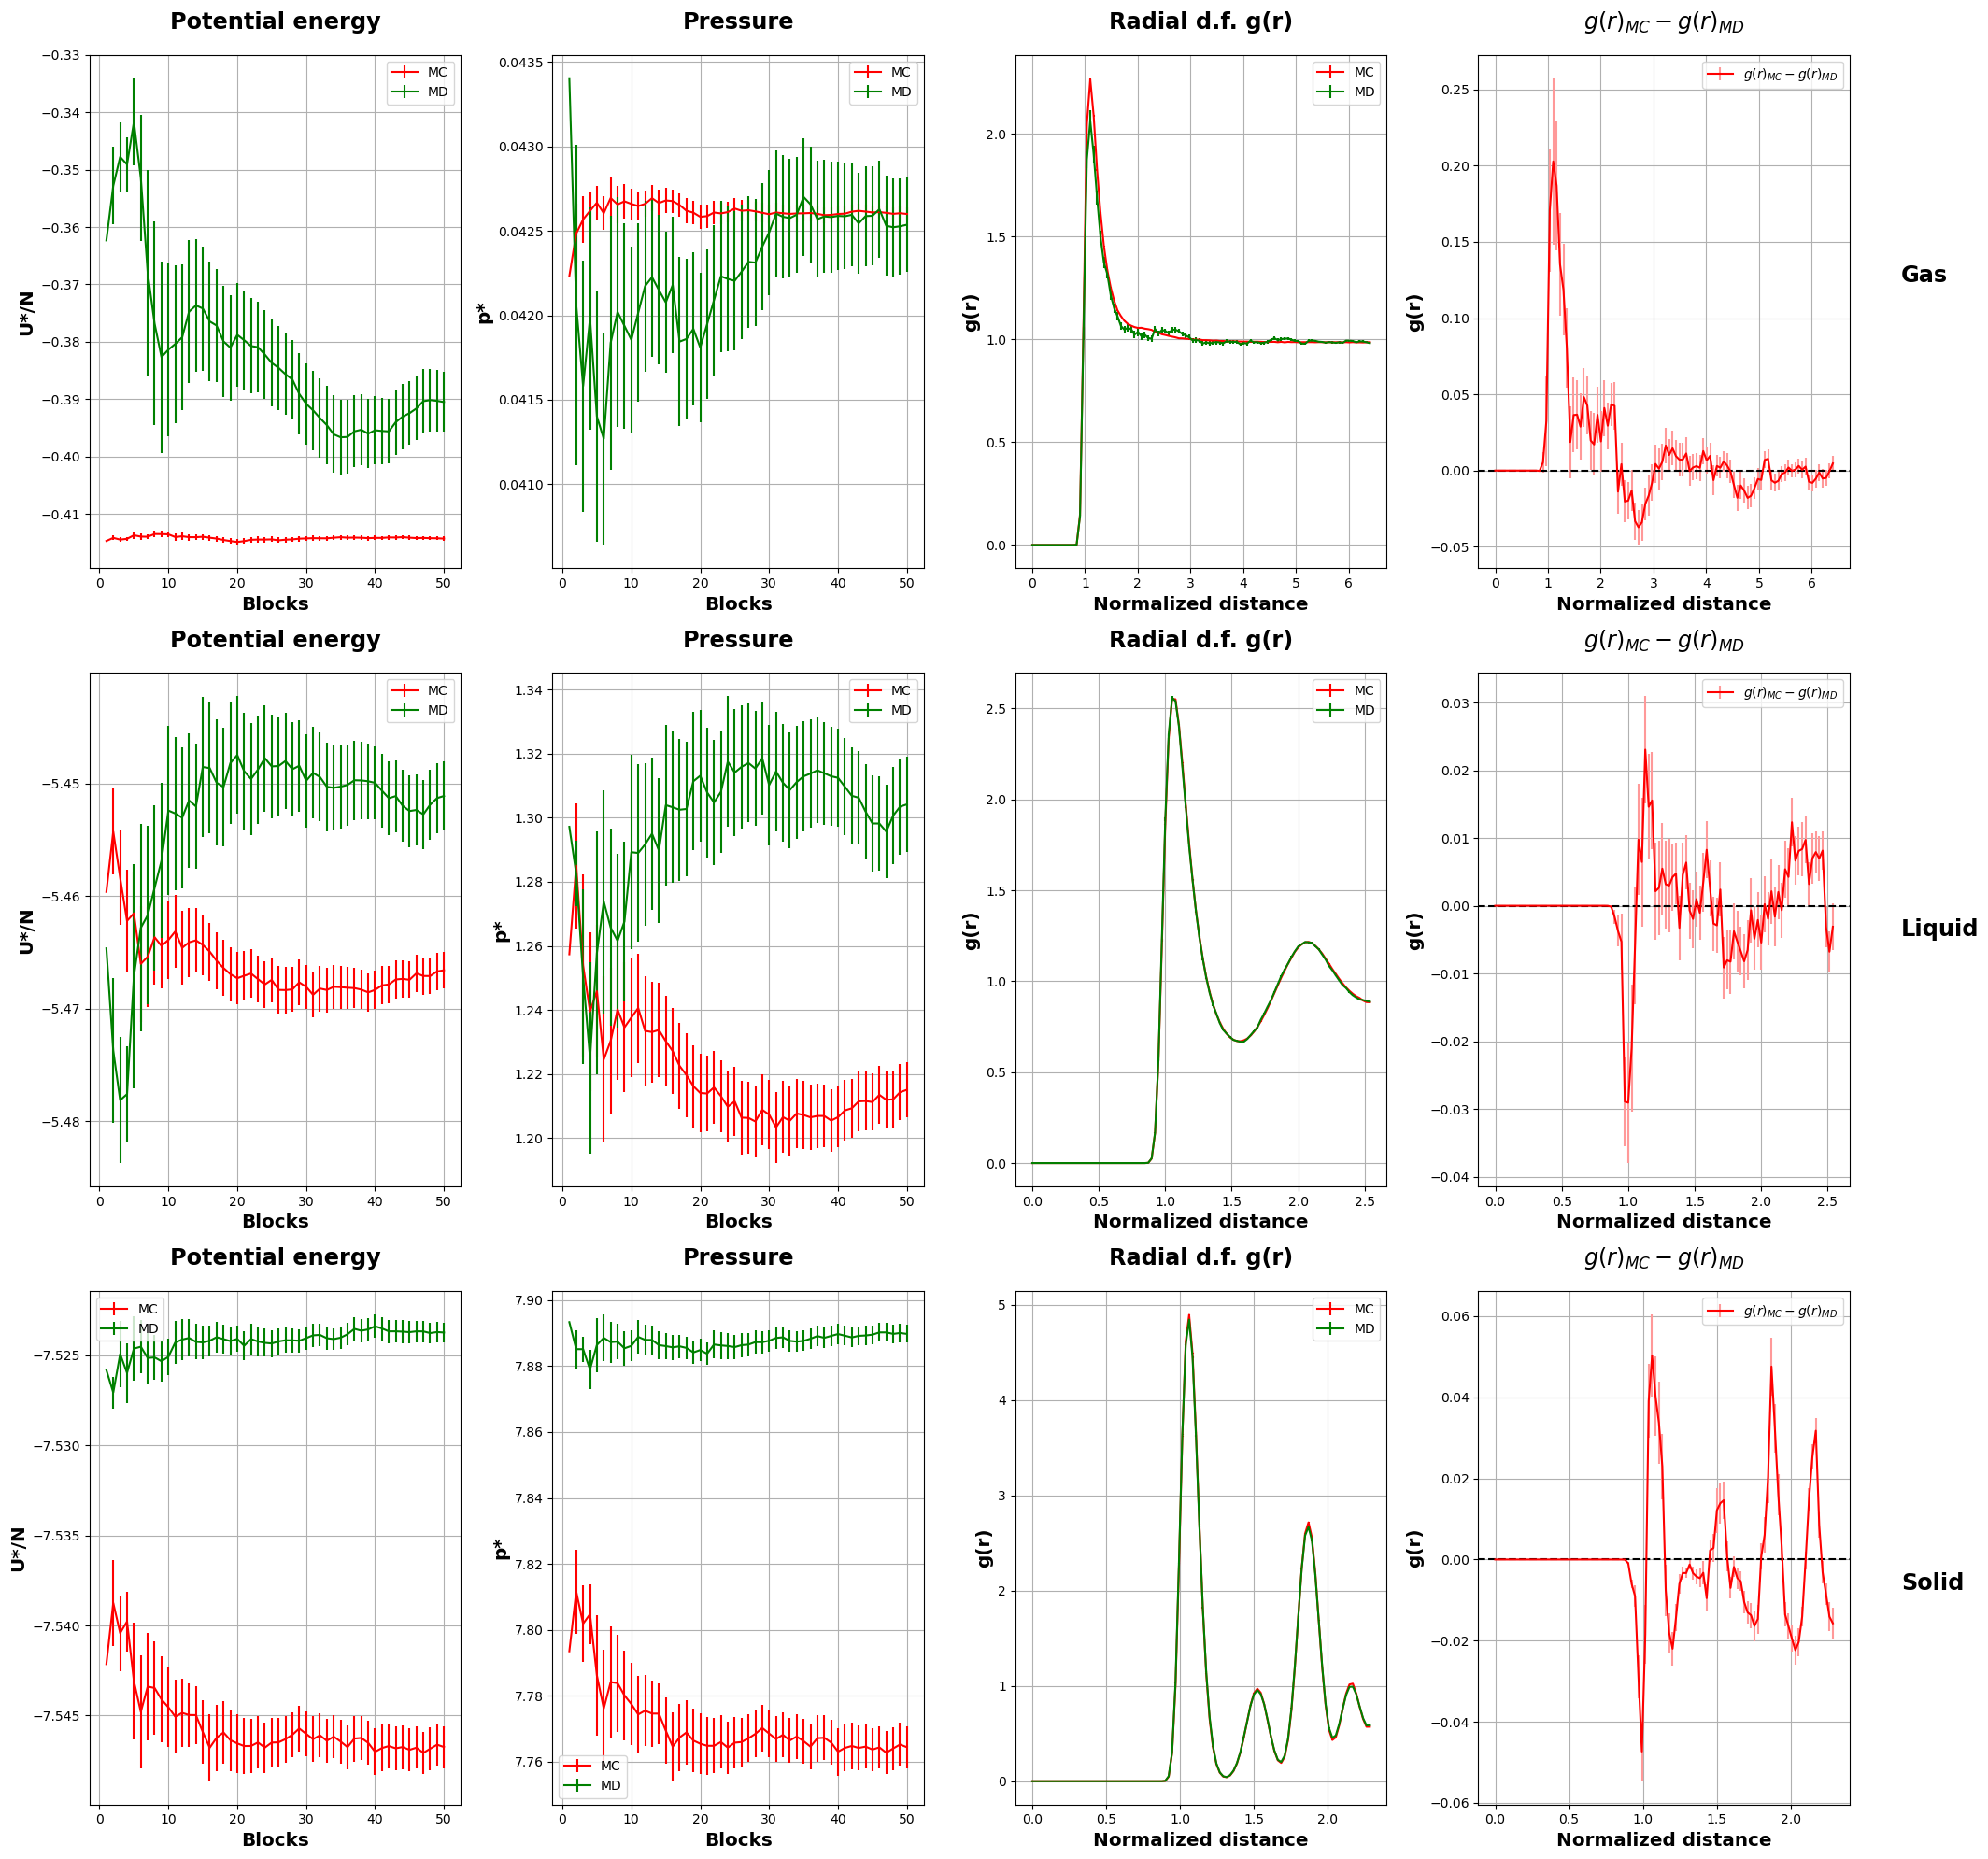

In [56]:
# 7.3.1
algorithm = ["MC", "MD"]
colors = {"MC": ["r", [1, 0.6, 0.6]], "MD": ["g", [0.6, 1, 0.6]]} # [color, errorbar color]
phase = ["Gas", "Liquid", "Solid"]
thermod_vars = ["potential_energy", "pressure", "gdr", "gdr_diff"]
# thermod_vars = ["gdr", "gdr_diff"]
titles = ["Potential energy", "Pressure", "Radial d.f. g(r)", "$g(r)_{MC}-g(r)_{MD}$"]
# titles = ["Radial d.f. g(r)", "$g(r)_{MC}-g(r)_{MD}$"]
units = ["U*/N", "p*", "g(r)", "g(r)"]
ascix = ["Blocks","Blocks","Normalized distance", "Normalized distance"]

fig = plt.figure(figsize=(20, 20)) # figsize=(width, height)

for i, ph in enumerate(phase):
    for j, td_v in enumerate(thermod_vars):
        ax = fig.add_subplot(3, 4, i * len(thermod_vars) + j + 1)

        if td_v in ["pressure", "potential_energy"]:
            for alg in algorithm:
                x, y, err  = np.loadtxt(f"../DATA/gofr/{alg}/{ph}/{td_v}.dat", usecols=(0, 2, 3), unpack=True, skiprows=1)
                ax.errorbar(x, y, err, marker='', label=alg, color=colors[alg][0])

        if td_v == "gdr":
            for k, alg in enumerate(algorithm):
                x, gdr, err = np.loadtxt(f"../DATA/gofr/{alg}/{ph}/gofr.dat", usecols=(0, 1, 2), unpack=True)
                ax.errorbar(x, gdr, err, marker='', label=alg, color=colors[alg][0])

        if td_v == "gdr_diff":
            data_MC = np.loadtxt(f"../DATA/gofr/MC/{ph}/gofr.dat", usecols=(0, 1, 2), unpack=True, skiprows=1)
            data_MD = np.loadtxt(f"../DATA/gofr/MD/{ph}/gofr.dat", usecols=(1, 2), unpack=True, skiprows=1)
            x, gdrMC, errMC = data_MC
            gdrMD, errMD = data_MD
            y = gdrMC - gdrMD
            err = np.sqrt(errMC**2 + errMD**2)
            ax.errorbar(x, y, err, marker='', label="$g(r)_{MC}-g(r)_{MD}$", color=colors["MC"][0], ecolor=colors["MC"][1])
            ax.axhline(y=0, color="k", linestyle="--")

        ax.set_title(titles[j], size='xx-large', weight='bold', pad=20, fontweight='bold')
        ax.set_ylabel(units[j], size='x-large', weight='bold')
        ax.set_xlabel(ascix[j], size='x-large', weight='bold')
        ax.grid(True)
        ax.legend()

# Define the position for the text labels
label_positions = [(1.02, 0.85), (1.02, 0.5), (1.02, 0.15)]  # Adjust as needed for alignment

# Add text labels to the right of the subplots
for i, ph in enumerate(phase):
    fig.text(label_positions[i][0], label_positions[i][1], ph, ha='left', va='center', fontsize='xx-large', weight='bold')

plt.tight_layout()
plt.show()

__Observations__

The different yet comparable average values of potential energy and pressure achieved by Molecular Dynamics (NVE) and Monte Carlo (NVT) simulations stem from several factors. One significant reason is that in molecular dynamics, we do not simulate precisely at the target temperature due to inherent uncertainties in the initial temperature selection. As observed in previous exercises, temperatures often fluctuate considerably around the equilibrium value during simulation runs. 

The radial distribution function $g(r)$ appears nearly identical when viewed from a distance, indicating that both sampling methods—Molecular Dynamics (NVE) and Monte Carlo (NVT)—yield comparable radial structures. This similarity underscores that both approaches effectively capture the spatial arrangement of particles within the system.